<a href="https://colab.research.google.com/github/aryansaini25/datascienceproject/blob/main/datasciencepart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd

# Load the CSV file
file_path = 'fraudTest.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()  # This drops any rows with missing values

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

numerical_features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])



   Unnamed: 0 trans_date_trans_time        cc_num  \
0           0   2020-06-21 12:14:25  2.291164e+15   
1           1   2020-06-21 12:14:33  3.573030e+15   
2           2   2020-06-21 12:14:53  3.598215e+15   
3           3   2020-06-21 12:15:15  3.591920e+15   
4           4   2020-06-21 12:15:17  3.526826e+15   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez

<ipython-input-27-a4d7042eda52>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_features] = scaler.fit_transform(df[numerical_features])


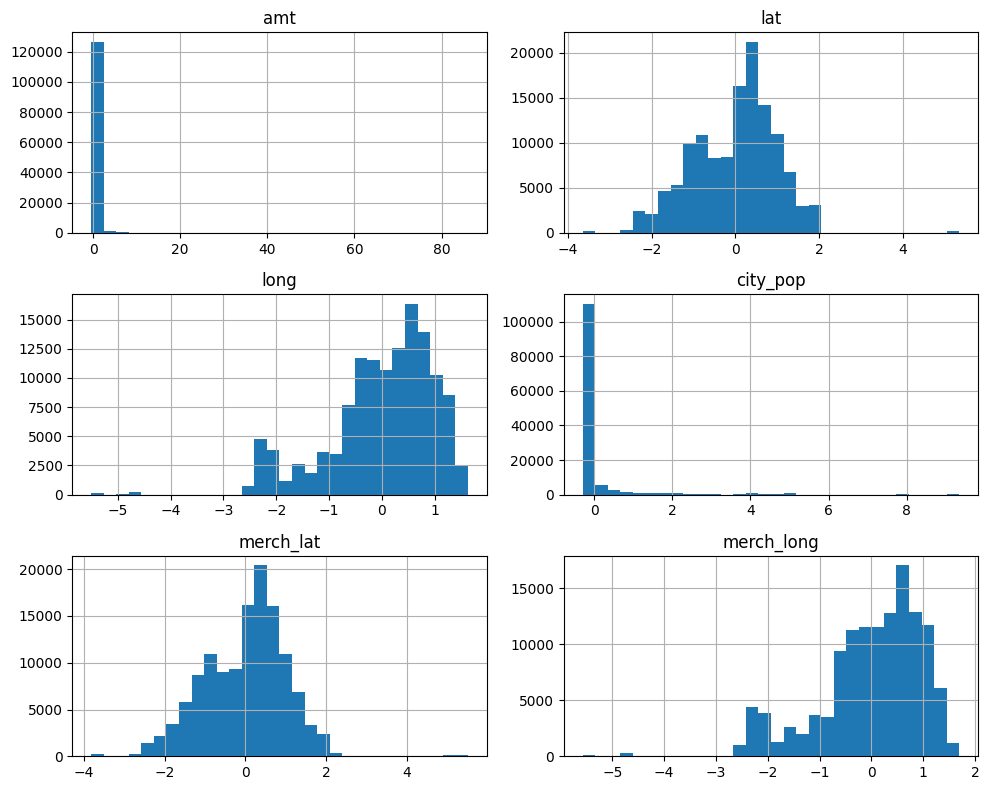

In [28]:
# Visualize the distribution of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
df[numerical_features].hist(figsize=(10, 8), bins=30, layout=(3, 2))
plt.tight_layout()
plt.show()

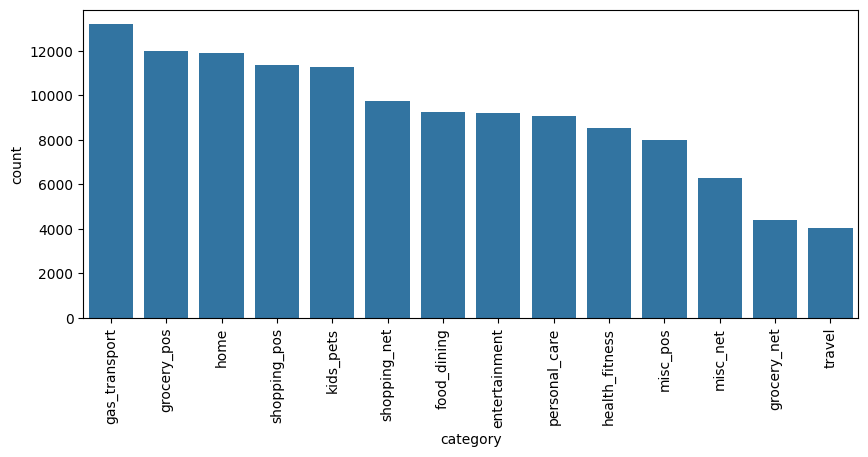

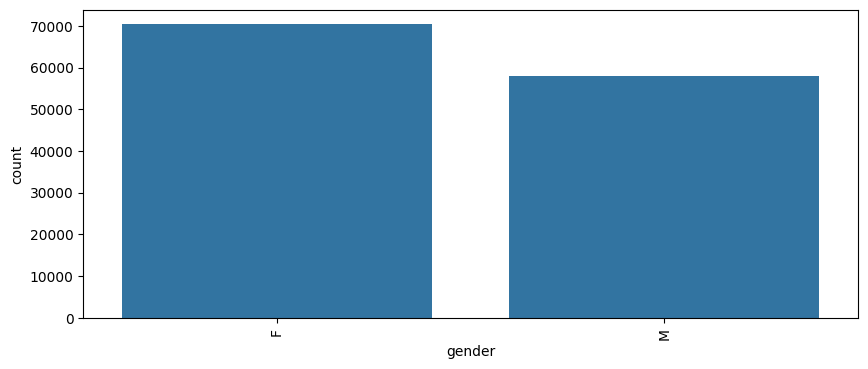

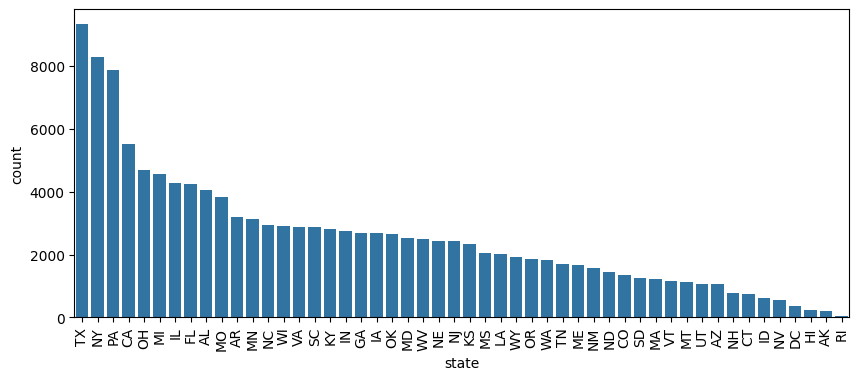

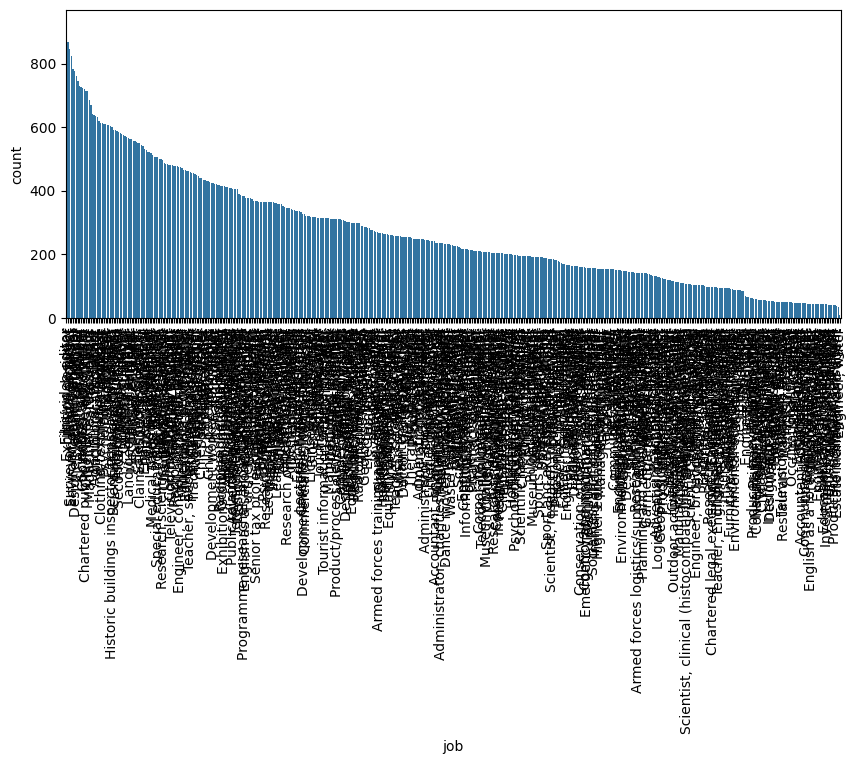

In [29]:
# Visualize categorical features
categorical_features = ['category', 'gender', 'state', 'job']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

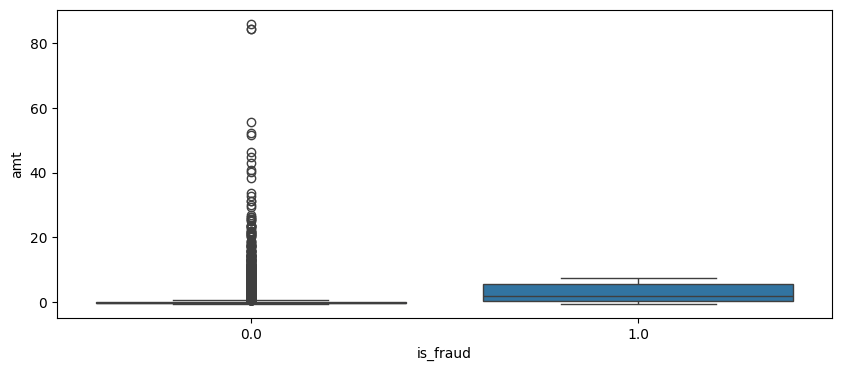

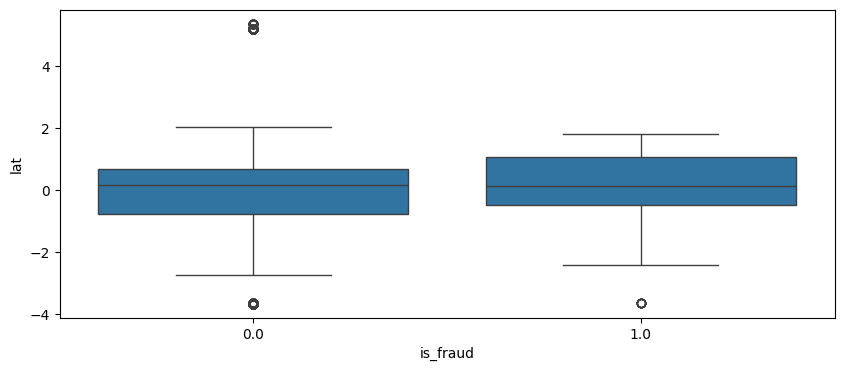

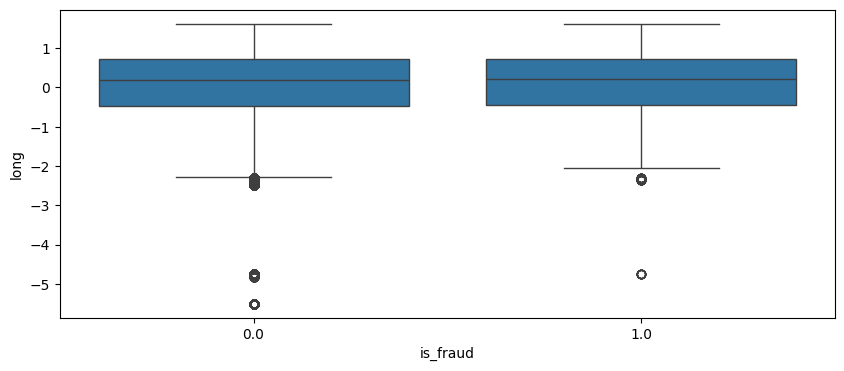

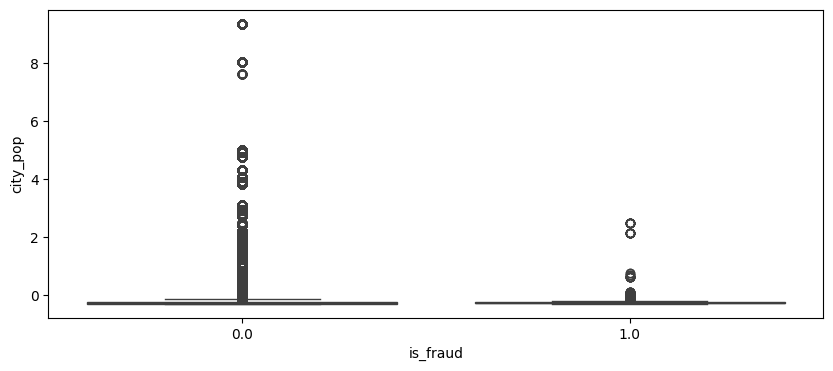

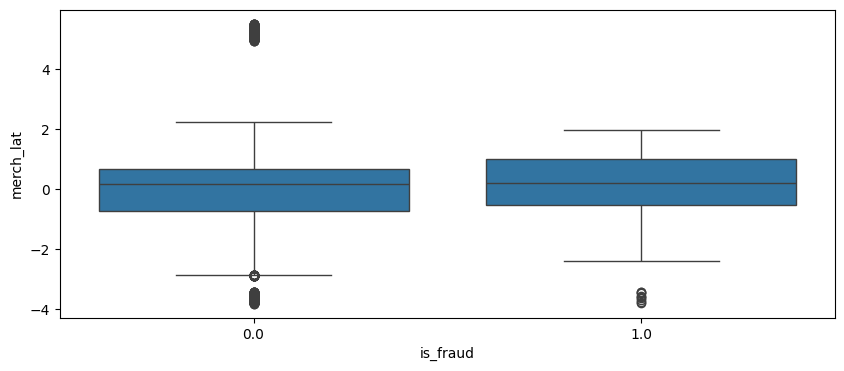

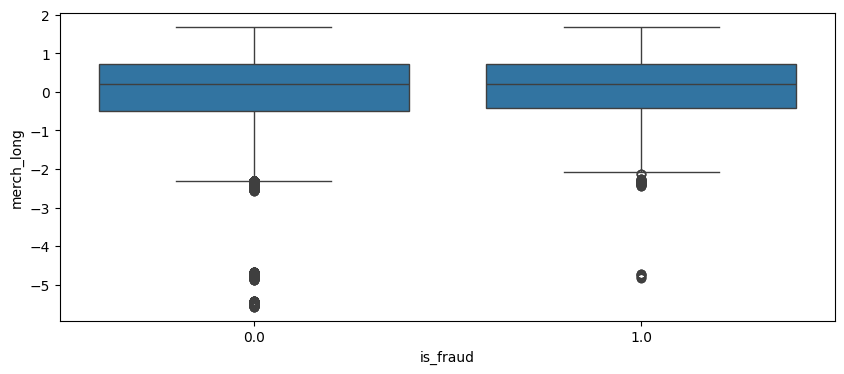

In [30]:
# Box plot to compare distributions for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x='is_fraud', y=feature)
    plt.show()

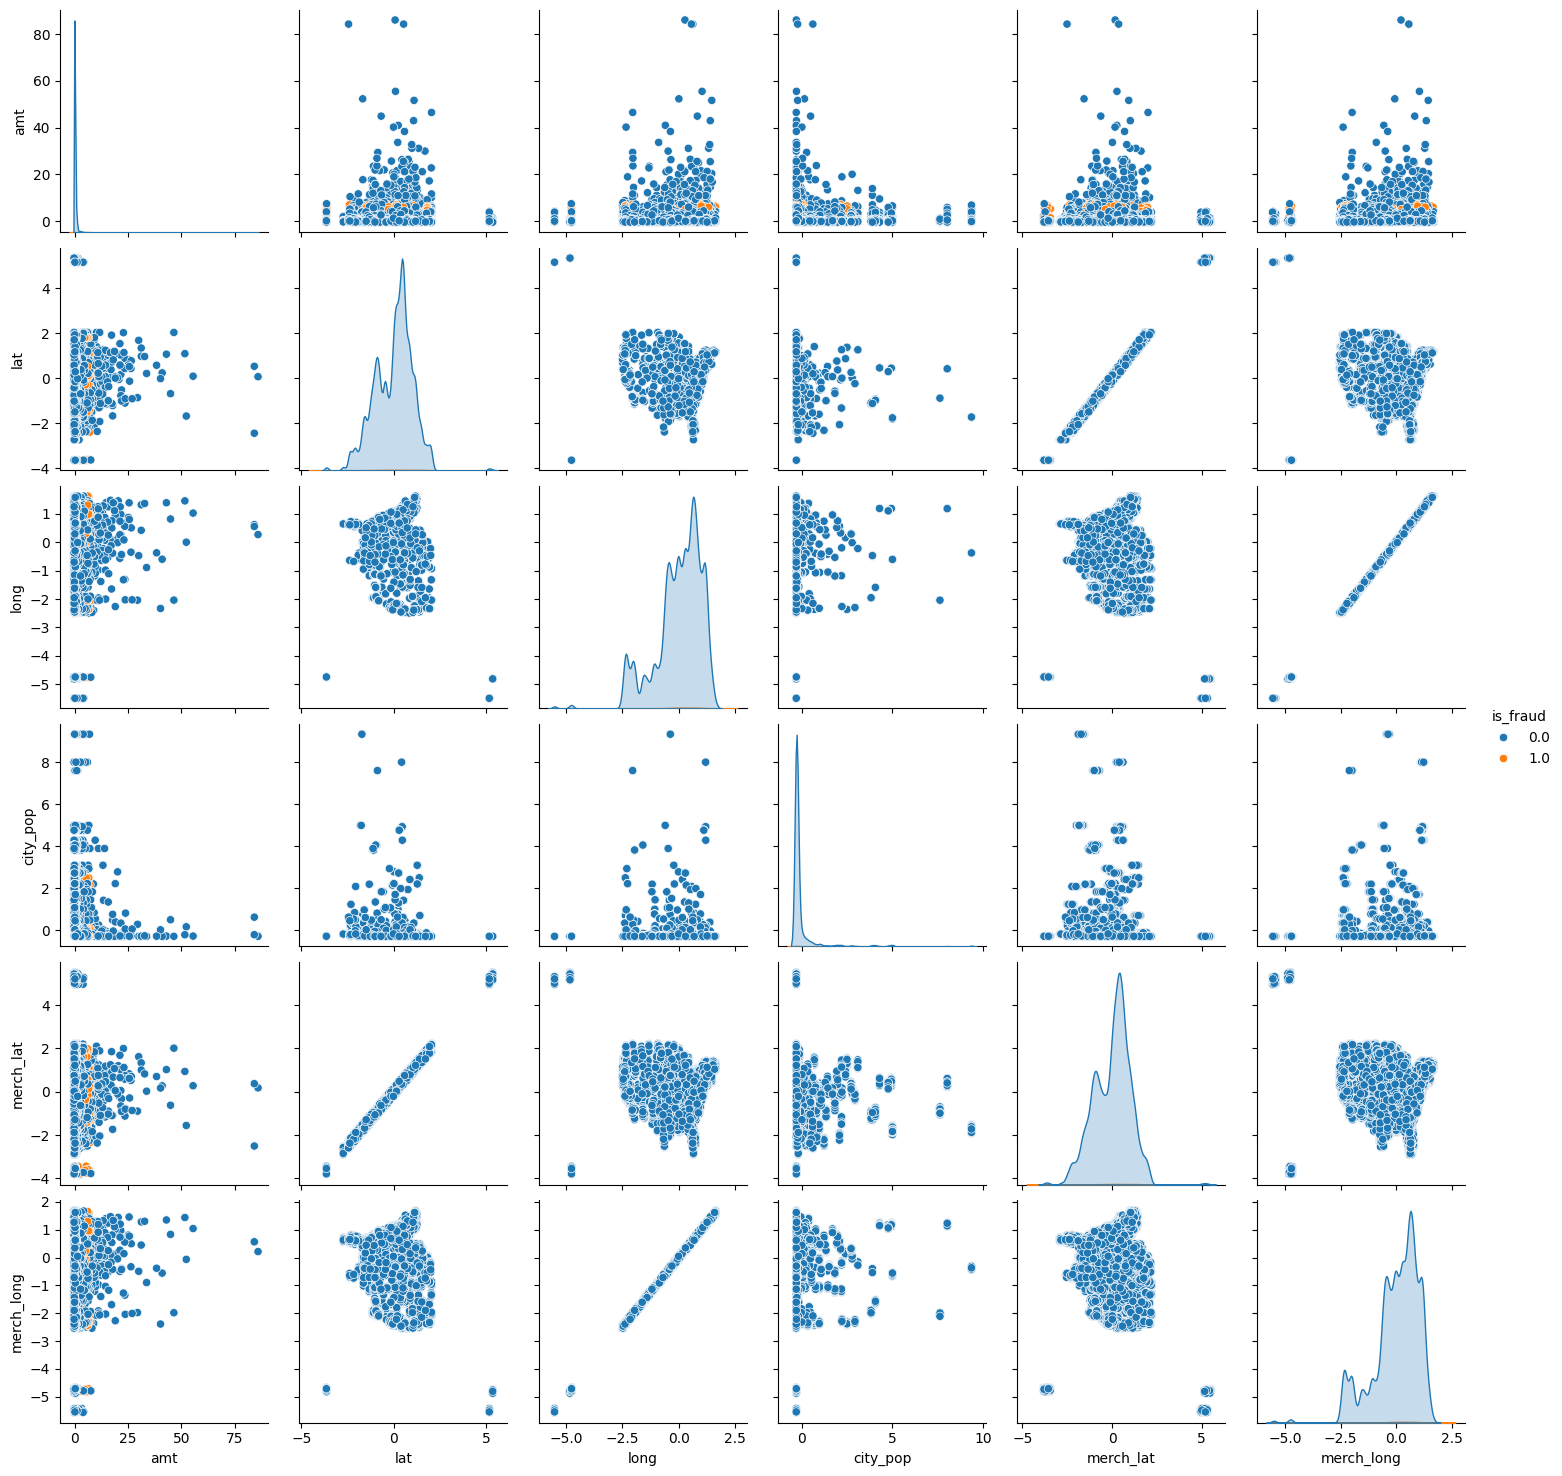

In [34]:
# Scatter plot to find relationships between features
sns.pairplot(df[numerical_features + ['is_fraud']], hue='is_fraud')
plt.show()

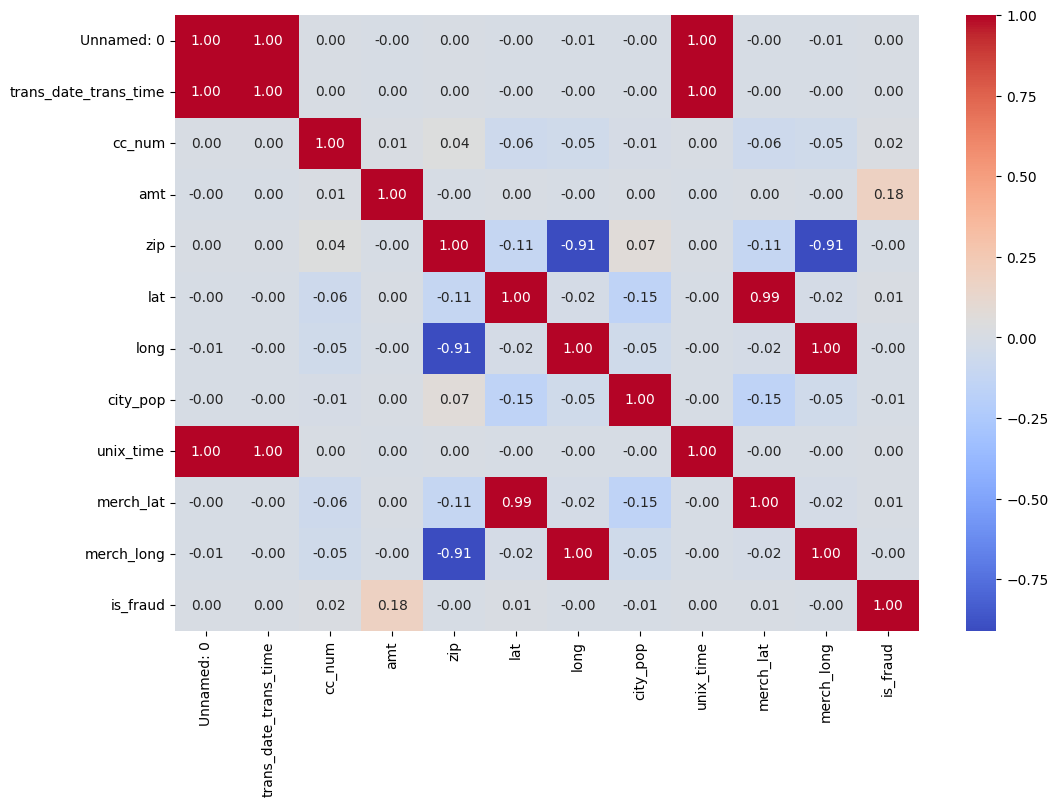

In [39]:
# Convert the datetime column to a numerical representation
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date_trans_time'] = (df['trans_date_trans_time'] - df['trans_date_trans_time'].min()).dt.total_seconds()

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Visualize the correlation matrix for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')